<a href="https://colab.research.google.com/github/navroz-lamba/DS-Unit-2-Linear-Models/blob/master/DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [2]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', 
                 parse_dates=['created'], 
                 index_col='created')

# assert df.shape == (49352, 34)


# dtype_dict = {'ZIP_CODE': 'object',
#               'YEAR_BUILT': int}

# df = pd.read_csv(DATA_PATH+'condos/tribeca.csv', 
#                  dtype=dtype_dict, 
#                  parse_dates=['SALE_DATE'],
#                  index_col='SALE_DATE')

In [4]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [5]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48818 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   description           47393 non-null  object 
 3   display_address       48685 non-null  object 
 4   latitude              48818 non-null  float64
 5   longitude             48818 non-null  float64
 6   price                 48818 non-null  int64  
 7   street_address        48808 non-null  object 
 8   interest_level        48818 non-null  object 
 9   elevator              48818 non-null  int64  
 10  cats_allowed          48818 non-null  int64  
 11  hardwood_floors       48818 non-null  int64  
 12  dogs_allowed          48818 non-null  int64  
 13  doorman               48818 non-null  int64  
 14  dishwasher            48818 non-nul

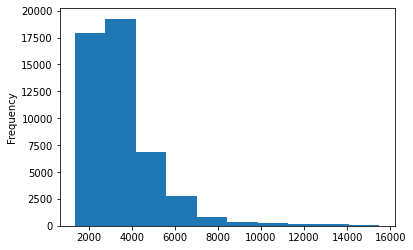

In [7]:
# plotting histogram of the target variable 
df['price'].plot(kind='hist')
# the data is positively skewed 

In [8]:
df['elevator'].value_counts()

1    25621
0    23197
Name: elevator, dtype: int64

In [9]:
df['bedrooms'].value_counts()

1    15651
2    14570
0     9317
3     7188
4     1825
5      221
6       43
8        2
7        1
Name: bedrooms, dtype: int64

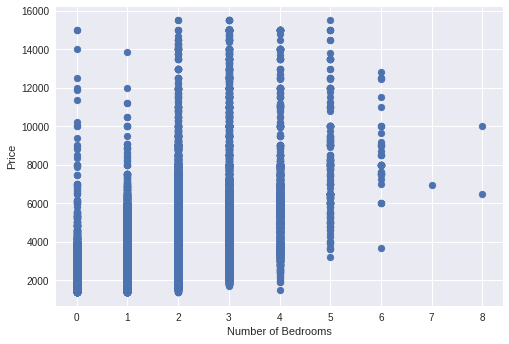

In [10]:
import matplotlib.pyplot as plt

# style
plt.style.use('seaborn')

plt.scatter(df['bedrooms'], df['price']);

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.show()

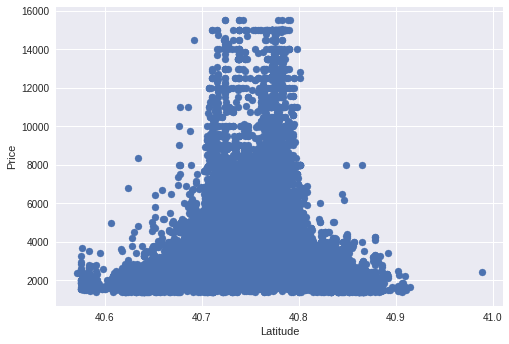

In [11]:
# style
plt.style.use('seaborn')

plt.scatter(df['latitude'], df['price']);

plt.xlabel('Latitude')
plt.ylabel('Price')

plt.show()

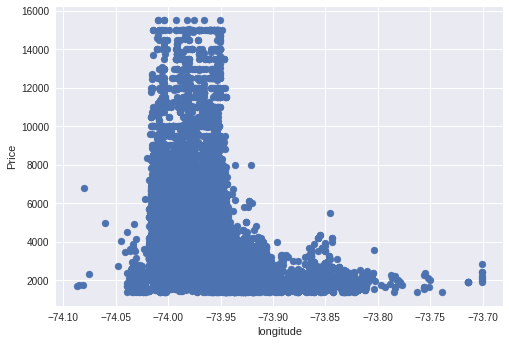

In [12]:
plt.style.use('seaborn')

plt.scatter(df['longitude'], df['price']);

plt.xlabel('longitude')
plt.ylabel('Price')

plt.show()

In [13]:
# working with total bedrooms and price
X = df[['bedrooms']]
y = df['price']

In [14]:
# # convert the created from an object to datetime so we can split our dataset using created 
# df["created"] = pd.to_datetime(df["created"])
# df["date_created"] = df["created"].dt.date
# df["date_created"]

In [15]:
# # make the new column date_created as the index
# df = df.set_index('created')
# df.head()

In [16]:
# date created ranges from April to June. We will make month of June as our test set 
# now we split the dataset in train and test 

cutoff = '2016-06-01'

# applying the filter 
filt = X.index < cutoff
X_train, y_train = X.loc[filt], y.loc[filt]
X_test, y_test = X.loc[~filt], y.loc[~filt]

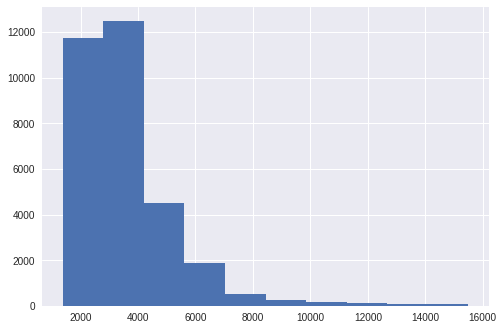

In [17]:
# baseline guess 

plt.hist(y_train);

In [18]:
baseline_guess = y_train.mean()

moe = abs(baseline_guess - y_train).mean()

print(f'prediction of a baseline model: ${round(baseline_guess,2)}, with a margin of error: ${round(moe,2)}')

prediction of a baseline model: $3575.6, with a margin of error: $1201.88


In [19]:
# need to make a model that is more accurate than the baseline model above 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train);

In [21]:
lin_reg.coef_[0]

855.5060260304634

In [22]:
lin_reg.intercept_

2268.0853918830353

we could write the line equation to solve for the rent as follows:

rent = 853.25 * (total_bedrooms) + 2267.97

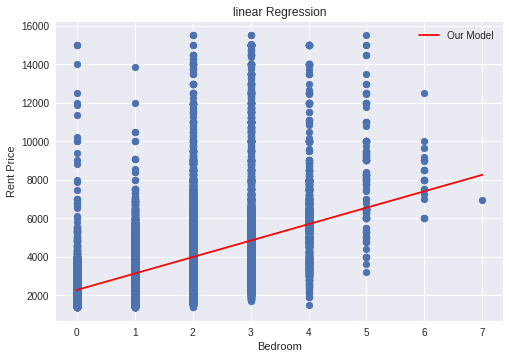

In [40]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = lin_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('linear Regression')
plt.legend()

plt.show()

In [24]:
# Calculating RMSE score 
rent_predictions = lin_reg.predict(X_train)
rmse_scores = np.sqrt(mean_squared_error(rent_predictions, y_train))
rmse_scores

1487.0443521047227

In [25]:
# validating the score using cross_val 
from sklearn.model_selection import cross_val_score

score = cross_val_score(lin_reg, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1483.2912961  1550.07381731 1390.58943078 1531.62196135 1477.28140797
 1533.03863079 1475.00273541 1507.80873648 1405.28591442 1509.3659328 ]
1486.3359863422213


50.24155672823417

In [26]:
# Scores on the test and validation set are almost the same. this model is low on bias and low on variance. Hence, a perfect generalized model 

we should be able to make the score better by adding polynomial regression as the reation is not exactly linear. 

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg  = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_reg.fit(X_train,y_train);


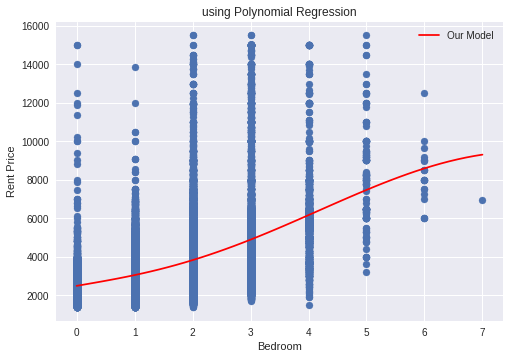

In [50]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = poly_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('using Polynomial Regression')
plt.legend()
plt.show()

In [51]:
# Calculating RMSE score 

rent_pred1 = poly_reg.predict(X_train)
rmse_scores = np.sqrt(mean_squared_error(rent_pred1, y_train))
rmse_scores

1476.282266703636

In [52]:
# validating the score using cross_val 

score = cross_val_score(poly_reg, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1475.25767533 1536.68331226 1381.12498941 1516.84466843 1466.57637462
 1521.75877377 1465.06577252 1496.47702578 1400.94430625 1498.60474232]
1475.9337640689114


48.18546843300138

In [53]:
# we got the best model possible with polynomial features degrees set to 5

Lets do it using Ridge Regression and see what we get. Don't accept to better resulst because model was not overfitting. 

In [32]:
from sklearn.linear_model import Ridge
# use Random Search to find the best value of alpha for ridge regression 
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge(normalize=True, random_state=42)
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1, 5,10, 20,30,40, 50, 60, 100, 110]}

ridge_reg = RandomizedSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error', cv=10, random_state=42)
ridge_reg.fit(X_train,y_train)

print(ridge_reg.best_params_)
print(ridge_reg.best_estimator_)

{'alpha': 1e-08}
Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=42, solver='auto', tol=0.001)


In [33]:
# using the best value of alpha for ridge lets calculate the rmse and see if we get any better results 

ridge = ridge_reg.best_estimator_

# Calculating RMSE score 

rent_pred2 = ridge.predict(X_train)
rmse_scores = np.sqrt(mean_squared_error(rent_pred2, y_train))
rmse_scores

1487.0443521047227

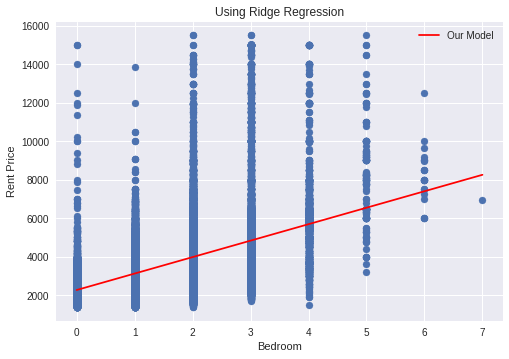

In [34]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = ridge.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('Using Ridge Regression')
plt.legend()
plt.show()

In [35]:
# validating the score using cross_val 

score = cross_val_score(ridge, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1483.2912959  1550.07381721 1390.58943054 1531.62196178 1477.2814081
 1533.03863086 1475.00273563 1507.80873665 1405.2859141  1509.36593259]
1486.335986337916


50.24155684910871

Lets try usin Stochastic Gradient Descent with ridge

In [36]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=42)
# lets start by finding out the best value of the learing rate 

parameters1 = {'eta0': [0.001, 0.005, 0.01, 0.03, 0.06, 0.09, 1, 1.05]}

sgd_regressor = RandomizedSearchCV(sgd_reg, parameters1, cv=10, scoring = 'neg_mean_squared_error', random_state=42)
sgd_regressor.fit(X_train,y_train)

print(sgd_regressor.best_params_)
print(sgd_regressor.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'eta0': 0.001}
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [37]:
sgd_reg = sgd_regressor.best_estimator_

rent_pred4 = sgd_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(rent_pred4, y_train))
rmse

1487.054838761284

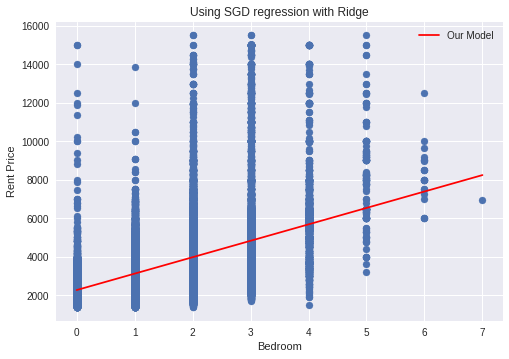

In [38]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred5 = sgd_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred5 , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('Using SGD regression with Ridge')
plt.legend()
plt.show()

In [39]:
# validating the score using cross_val 
# shouldn't be any different than ridge regression

score = cross_val_score(sgd_reg, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1483.07314153 1550.22667037 1390.5568185  1531.88962218 1477.2438601
 1532.75587399 1474.78121731 1507.68317492 1405.73079338 1509.49827269]
1486.343944496717


50.20141858507317